# 1. Anomaly detection

In [1]:
import numpy as np
from scipy.io import loadmat
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import utils
# Auto reload the utils library
%load_ext autoreload
%autoreload 2

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## 1.1. Load Example Dataset

In [2]:
data = loadmat('ex8data1.mat')

In [3]:
X = data['X']
Xval = data['Xval']

In [4]:
yval = data['yval']

In [5]:
X.shape

(307, 2)

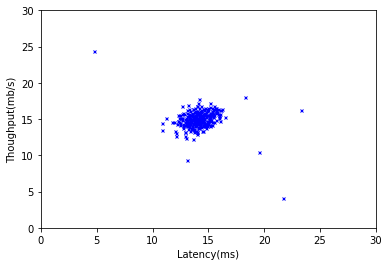

In [6]:
plt.plot(X[:, :1], X[:, -1:], 'x', c='blue', ms=3)
plt.axis([0, 30, 0, 30])
plt.xlabel('Latency(ms)')
plt.ylabel('Thoughput(mb/s)')
plt.show()

## 1.2. Estimating parameters for a Gaussian

In [7]:
mu, sigma2 = utils.estimateGaussian(X)

In [8]:
mu

array([[14.11222578],
       [14.99771051]])

In [9]:
sigma2

array([[1.83263141],
       [1.70974533]])

In [10]:
# Return the density of the multivariate normal at each data point (row) of X
p = utils.multivariateGaussian(X, mu, sigma2)

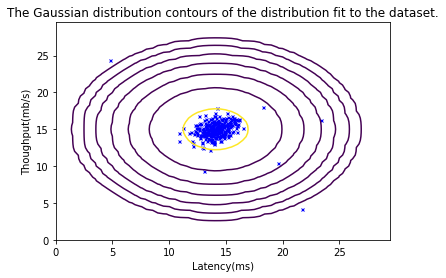

In [11]:
# Visualize the fit
utils.visualizeFit(X, mu, sigma2)
plt.xlabel('Latency(ms)')
plt.ylabel('Thoughput(mb/s)')
plt.title('The Gaussian distribution contours of the distribution fit to the dataset.')
plt.show()

## 1.3. Selecting the threshold, ε

In [12]:
pval = utils.multivariateGaussian(Xval, mu, sigma2)
epsilon, F1 = utils.selectThreshold(yval, pval)

D:\work\Courses\Machine Learning\Anomaly Detection and Recommender Systems\python code\utils.py:92: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


In [13]:
print('Best epsilon found using cross-validation: {}'.format(epsilon))
print('Best F1 on Cross-validation set: {}'.format(F1))
print('(you should see a value epsilon of about 8.99e-05)')
print('(you should see a Best F1 value of  0.875000)')

Best epsilon found using cross-validation: 8.990852779269493e-05
Best F1 on Cross-validation set: 0.8750000000000001
(you should see a value epsilon of about 8.99e-05)
(you should see a Best F1 value of  0.875000)


In [14]:
# Find the outliers in the training set and plot them
outliers = (p < epsilon).ravel()

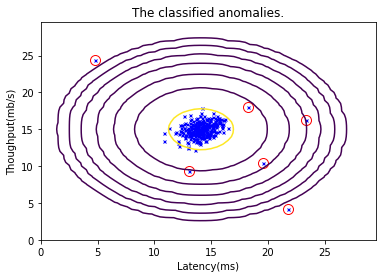

In [15]:
# Draw a red circle around those outliers
plt.plot(X[outliers, 0], X[outliers, 1], 'ro', markersize=10, fillstyle='none')
utils.visualizeFit(X, mu, sigma2)
plt.xlabel('Latency(ms)')
plt.ylabel('Thoughput(mb/s)')
plt.title('The classified anomalies.')
plt.show()

## 1.4. High dimensional dataset

In [16]:
# Load the second dataset
data = loadmat('ex8data2.mat')
X = data['X']
Xval = data['Xval']
yval = data['yval']

In [17]:
X.shape

(1000, 11)

In [18]:
# estimate mu and sigma2
mu, sigma2 = utils.estimateGaussian(X)

In [19]:
# Training set
p = utils.multivariateGaussian(X, mu, sigma2)

In [20]:
# Cross-validation set
pval = utils.multivariateGaussian(Xval, mu, sigma2)

In [21]:
# Find the best threshold
epsilon, F1 = utils.selectThreshold(yval, pval)

In [22]:
print('Best Epsilon found using cross-validation: {}'.format(epsilon))
print('Best F1 on cross-validation set: {}'.format(F1))
print('Number of outliers found: {}'.format(sum(p < epsilon)[0]))

Best Epsilon found using cross-validation: 1.3772288907613575e-18
Best F1 on cross-validation set: 0.6153846153846154
Number of outliers found: 117


# 2. Recommender Systems

## 2.1. Movie ratings dataset

In [23]:
data = loadmat('ex8_movies.mat')

In [24]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec  1 17:19:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Y': array([[5, 4, 0, ..., 5, 0, 0],
        [3, 0, 0, ..., 0, 0, 5],
        [4, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'R': array([[1, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [25]:
Y = data['Y']

In [26]:
Y.shape

(1682, 943)

In [27]:
R = data['R']

In [28]:
R.shape

(1682, 943)

In [29]:
# From the matrix, statistics like average rating can be computed.
print('Average rating for movie 1 (Toy Story): {0:.2f}/5'.format(np.mean(Y[0, R[0, :] == 1])))

Average rating for movie 1 (Toy Story): 3.88/5


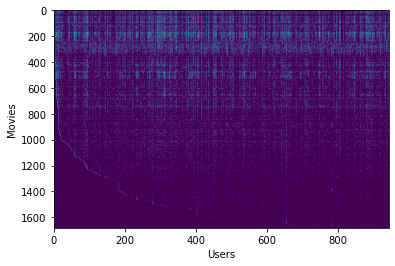

In [30]:
# Visualize the ratings matrix by plotting it with imshow
plt.imshow(Y, aspect='auto')
plt.xlabel('Users')
plt.ylabel("Movies")
plt.show()

In [31]:
# Load pre-trained weights (X, Theta, num_users, num_movies, num_features)
movieParams_data = loadmat('ex8_movieParams.mat')
X = movieParams_data['X']
Theta = movieParams_data['Theta']

In [32]:
X.shape

(1682, 10)

In [33]:
Theta.shape

(943, 10)

## 2.2. Collaborative filtering learning algorithm

In [34]:
# Reduce the data set size so that this runs faster
num_users = 4
num_movies = 5
num_features = 3
reduced_X = X[:num_movies, :num_features]
reduced_Theta = Theta[:num_users, :num_features]
reduced_Y = Y[:num_movies, :num_users]
reduced_R = R[:num_movies, :num_users]

In [35]:
# create a list of my X and Theta
lst_params = [reduced_X, reduced_Theta]

In [36]:
lst_params

[array([[ 1.0486855 , -0.40023196,  1.19411945],
        [ 0.78085123, -0.38562591,  0.52119779],
        [ 0.64150886, -0.54785385, -0.08379638],
        [ 0.45361782, -0.80021844,  0.68048129],
        [ 0.93753789,  0.1060899 ,  0.36195295]]),
 array([[ 0.28544362, -1.68426509,  0.26293877],
        [ 0.50501321, -0.45464846,  0.31746244],
        [-0.43191656, -0.47880449,  0.84671111],
        [ 0.72859839, -0.27189391,  0.3268436 ]])]

In [37]:
unrolled_params = [lst_params[i].ravel() for i,_ in enumerate(lst_params)]

In [38]:
unrolled_params

[array([ 1.0486855 , -0.40023196,  1.19411945,  0.78085123, -0.38562591,
         0.52119779,  0.64150886, -0.54785385, -0.08379638,  0.45361782,
        -0.80021844,  0.68048129,  0.93753789,  0.1060899 ,  0.36195295]),
 array([ 0.28544362, -1.68426509,  0.26293877,  0.50501321, -0.45464846,
         0.31746244, -0.43191656, -0.47880449,  0.84671111,  0.72859839,
        -0.27189391,  0.3268436 ])]

In [39]:
params = np.concatenate(unrolled_params)
params

array([ 1.0486855 , -0.40023196,  1.19411945,  0.78085123, -0.38562591,
        0.52119779,  0.64150886, -0.54785385, -0.08379638,  0.45361782,
       -0.80021844,  0.68048129,  0.93753789,  0.1060899 ,  0.36195295,
        0.28544362, -1.68426509,  0.26293877,  0.50501321, -0.45464846,
        0.31746244, -0.43191656, -0.47880449,  0.84671111,  0.72859839,
       -0.27189391,  0.3268436 ])

### 2.2.1. Collaborative filtering cost function

In [40]:
# Evaluate cost function
J, _ = utils.cofiCostFunc(params, reduced_Y, reduced_R, num_users, num_movies, num_features, 0)

print('Cost at loaded parameters: {:0.2f}'.format(J))
print('This value should be about 22.22')

Cost at loaded parameters: 22.22
This value should be about 22.22


### 2.2.2. Collaborative filtering gradient

In [41]:
print('Checking Gradients (without regularization)...\n')
# Checking gradients by running checkCostFunction
utils.checkCostFunction(0)

Checking Gradients (without regularization)...

Numerical Gradient:   0.157013, Analytical Gradient   0.157013
Numerical Gradient:   0.170137, Analytical Gradient   0.170137
Numerical Gradient:   0.330280, Analytical Gradient   0.330280
Numerical Gradient:   0.300851, Analytical Gradient   0.300851
Numerical Gradient:   0.199792, Analytical Gradient   0.199792
Numerical Gradient:   0.419587, Analytical Gradient   0.419587
Numerical Gradient:  -0.212230, Analytical Gradient  -0.212230
Numerical Gradient:  -0.335617, Analytical Gradient  -0.335617
Numerical Gradient:  -0.577924, Analytical Gradient  -0.577924
Numerical Gradient:  -0.024301, Analytical Gradient  -0.024301
Numerical Gradient:  -0.287760, Analytical Gradient  -0.287760
Numerical Gradient:   0.109396, Analytical Gradient   0.109396
Numerical Gradient:   0.387876, Analytical Gradient   0.387876
Numerical Gradient:   0.250453, Analytical Gradient   0.250453
Numerical Gradient:   0.403720, Analytical Gradient   0.403720
Numeric

In [42]:
# Evaluating cost function
J, _ = utils.cofiCostFunc(params, reduced_Y, reduced_R, num_users, num_movies, num_features, 1.5)

print('Cost at loaded parameters (lambda_coef = 1.5): {:0.2f} \n(this value should be 31.34\n)'.format(J))

print('Checking Gradients (with regularization)...\n')
utils.checkCostFunction(1.5)

Cost at loaded parameters (lambda_coef = 1.5): 31.34 
(this value should be 31.34
)
Checking Gradients (with regularization)...

Numerical Gradient:   0.108516, Analytical Gradient   0.108516
Numerical Gradient:   0.499490, Analytical Gradient   0.499490
Numerical Gradient:  -1.232760, Analytical Gradient  -1.232760
Numerical Gradient:   0.524836, Analytical Gradient   0.524836
Numerical Gradient:   0.169132, Analytical Gradient   0.169132
Numerical Gradient:   1.144885, Analytical Gradient   1.144885
Numerical Gradient:   0.555288, Analytical Gradient   0.555288
Numerical Gradient:   0.149215, Analytical Gradient   0.149215
Numerical Gradient:  -0.290884, Analytical Gradient  -0.290884
Numerical Gradient:  -0.535342, Analytical Gradient  -0.535342
Numerical Gradient:   0.725321, Analytical Gradient   0.725321
Numerical Gradient:  -1.226327, Analytical Gradient  -1.226327
Numerical Gradient:  -0.474288, Analytical Gradient  -0.474288
Numerical Gradient:  -0.157333, Analytical Gradient 

## 2.3. Learning movie recommendations

### 2.3.1 Recommendations

In [43]:
movieList = utils.loadMovieList()

In [44]:
movieList

['ToyStory(1995)',
 'GoldenEye(1995)',
 'FourRooms(1995)',
 'GetShorty(1995)',
 'Copycat(1995)',
 'ShanghaiTriad(Yaoayaoyaodaowaipoqiao)(1995)',
 'TwelveMonkeys(1995)',
 'Babe(1995)',
 'DeadManWalking(1995)',
 'RichardIII(1995)',
 'Seven(Se7en)(1995)',
 'UsualSuspects,The(1995)',
 'MightyAphrodite(1995)',
 'Postino,Il(1994)',
 "Mr.Holland'sOpus(1995)",
 'FrenchTwist(Gazonmaudit)(1995)',
 'FromDuskTillDawn(1996)',
 'WhiteBalloon,The(1995)',
 "Antonia'sLine(1995)",
 'AngelsandInsects(1995)',
 'MuppetTreasureIsland(1996)',
 'Braveheart(1995)',
 'TaxiDriver(1976)',
 'RumbleintheBronx(1995)',
 'Birdcage,The(1996)',
 'BrothersMcMullen,The(1995)',
 'BadBoys(1995)',
 'Apollo13(1995)',
 'BatmanForever(1995)',
 'Belledejour(1967)',
 'CrimsonTide(1995)',
 'Crumb(1994)',
 'Desperado(1995)',
 'DoomGeneration,The(1995)',
 'FreeWilly2:TheAdventureHome(1995)',
 'MadLove(1995)',
 'Nadja(1994)',
 'Net,The(1995)',
 'StrangeDays(1995)',
 'ToWongFoo,ThanksforEverything!JulieNewmar(1995)',
 'BillyMadison(19

In [45]:
# Initialize ratings
my_ratings = np.zeros((1682, 1))

# Check the file movie_idx.txt for id of each movie in the dataset.
# For example, Toy Story (1995) has ID 0, so to rate it "4", set:
my_ratings[0] = 4

# Or suppose did not enjoy The Mask (1994), so set:
my_ratings[71] = 1

# Select a few movies and rate them:
my_ratings[8] = 3
my_ratings[12]= 3
my_ratings[32]= 2
my_ratings[44] = 5
my_ratings[60] = 5
my_ratings[63] = 4
my_ratings[67] = 3
my_ratings[85] = 5
my_ratings[117] = 1
my_ratings[153] = 4
my_ratings[155] = 5
my_ratings[164] = 5
my_ratings[174] = 4
my_ratings[178] = 5
my_ratings[193] = 4
my_ratings[354] = 2
my_ratings[442] = 4
my_ratings[478] = 5
my_ratings[514] = 5
my_ratings[606] = 5
my_ratings[633] = 5
my_ratings[639] = 5
my_ratings[649] = 5
my_ratings[954] = 5
my_ratings[1422] = 3

print('User ratings:')
for i, rating in enumerate(my_ratings):
    if rating > 0:
        print("Rated {} for {}".format(rating[0], movieList[i]))

User ratings:
Rated 4.0 for ToyStory(1995)
Rated 3.0 for DeadManWalking(1995)
Rated 3.0 for MightyAphrodite(1995)
Rated 2.0 for Desperado(1995)
Rated 5.0 for EatDrinkManWoman(1994)
Rated 5.0 for ThreeColors:White(1994)
Rated 4.0 for ShawshankRedemption,The(1994)
Rated 3.0 for Crow,The(1994)
Rated 1.0 for Mask,The(1994)
Rated 5.0 for RemainsoftheDay,The(1993)
Rated 1.0 for Twister(1996)
Rated 4.0 for MontyPython'sLifeofBrian(1979)
Rated 5.0 for ReservoirDogs(1992)
Rated 5.0 for JeandeFlorette(1986)
Rated 4.0 for Brazil(1985)
Rated 5.0 for ClockworkOrange,A(1971)
Rated 4.0 for Sting,The(1973)
Rated 2.0 for Sphere(1998)
Rated 4.0 for Birds,The(1963)
Rated 5.0 for Vertigo(1958)
Rated 5.0 for Boot,Das(1981)
Rated 5.0 for Rebecca(1940)
Rated 5.0 for Microcosmos:Lepeupledel'herbe(1996)
Rated 5.0 for CooktheThiefHisWife&HerLover,The(1989)
Rated 5.0 for SeventhSeal,The(Sjundeinseglet,Det)(1957)
Rated 5.0 for BeforeSunrise(1995)
Rated 3.0 for WalkingDead,The(1995)


In [46]:
Y.shape

(1682, 943)

In [47]:
R.shape

(1682, 943)

In [48]:
# Add my ratings to the data matrix
Y = np.column_stack((my_ratings, Y))
R = np.column_stack(((my_ratings != 0), R))

In [49]:
Y.shape

(1682, 944)

In [50]:
R.shape

(1682, 944)

In [51]:
# Normalize ratings
[Ynorm, Ymean] = utils.normalizeRatings(Y, R)
print('Ynorm = {}'.format(Ynorm))
print('Ymean = {}'.format(Ymean))

Ynorm = [[ 0.1214128   1.1214128   0.1214128  ...  1.1214128   0.
   0.        ]
 [ 0.         -0.20610687  0.         ...  0.          0.
   1.79389313]
 [ 0.          0.96666667  0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Ymean = [[3.8785872 ]
 [3.20610687]
 [3.03333333]
 ...
 [2.        ]
 [3.        ]
 [3.        ]]


In [52]:
# Get useful values.
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10

In [53]:
# Set initial parameters (Theta, X).
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)

initial_parameters = np.concatenate((X.reshape(X.size),
                                     Theta.reshape(Theta.size)))

In [54]:
# Set options
options = {'maxiter': 100, 'disp': True}

# set regularization
lambda_coef = 10

# Create short hand for cost function
costFunc = lambda p: utils.cofiCostFunc(p, Ynorm, R, num_users, num_movies, num_features, lambda_coef)

# Optimize
result = minimize(costFunc, x0=initial_parameters, options=options, method='CG', jac=True)

         Current function value: 38984.046135
         Iterations: 100
         Function evaluations: 145
         Gradient evaluations: 145


In [55]:
result

     fun: 38984.046134794495
     jac: array([-0.17617148, -0.16743716, -0.3261526 , ...,  0.03777654,
       -0.04262334,  0.0979163 ])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 145
     nit: 100
    njev: 145
  status: 1
 success: False
       x: array([-1.02257914,  0.04125462, -0.51337566, ..., -0.3751028 ,
       -0.50369433,  0.60441838])

In [56]:
params = result.x

# Unfold results back into the parameters X and Theta.
X = np.reshape(params[:num_movies * num_features], (num_movies, num_features))
Theta = np.reshape(params[num_movies * num_features:], (num_users, num_features))

print('\nRecommender system learning completed!')


Recommender system learning completed!


In [57]:
p = np.dot(X, Theta.T)
# Get first column (my predictions) and add Ymean
my_predictions = p[:, 0] + Ymean.flatten()

# Reverse sort by index
ix = my_predictions.argsort()[::-1]

In [58]:
print('Top 10 recommendations for me:\n')
for i in range(10):
    j = ix[i]
    print('Predicting rating {:0.2f} for movie {}'.format(my_predictions[j], movieList[j]))
    
print('\n\nOriginal ratings provided:\n')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated {} for {}'.format(my_ratings[i][0], movieList[i]))

Top 10 recommendations for me:

Predicting rating 5.00 for movie SantawithMuscles(1996)
Predicting rating 5.00 for movie Prefontaine(1997)
Predicting rating 5.00 for movie MarleneDietrich:ShadowandLight(1996)
Predicting rating 5.00 for movie TheyMadeMeaCriminal(1939)
Predicting rating 5.00 for movie SomeoneElse'sAmerica(1995)
Predicting rating 5.00 for movie EntertainingAngels:TheDorothyDayStory(1996)
Predicting rating 5.00 for movie SaintofFortWashington,The(1993)
Predicting rating 5.00 for movie GreatDayinHarlem,A(1994)
Predicting rating 5.00 for movie Aiqingwansui(1994)
Predicting rating 5.00 for movie StarKid(1997)


Original ratings provided:

Rated 4.0 for ToyStory(1995)
Rated 3.0 for DeadManWalking(1995)
Rated 3.0 for MightyAphrodite(1995)
Rated 2.0 for Desperado(1995)
Rated 5.0 for EatDrinkManWoman(1994)
Rated 5.0 for ThreeColors:White(1994)
Rated 4.0 for ShawshankRedemption,The(1994)
Rated 3.0 for Crow,The(1994)
Rated 1.0 for Mask,The(1994)
Rated 5.0 for RemainsoftheDay,The(19

# Reference:
https://gtraskas.github.io/post/ex8/